# *Data Load*

In [1]:
import pandas as pd
import numpy as np
from pshmodule.utils import filemanager as fm

In [2]:
df = fm.load('../../data/df_users_whole_info.pickle')

extension : .pickle
Loaded 396808 records from ../../data/df_users_whole_info.pickle


In [3]:
df.head()

,user_uuid,marketing_channel,sex,age_group,date_joined,os,visits,revenue
0,05b0058df377da90c21c585649cbf415,0,0,1,4,0,23,304.0
1,28b7062943065c84bb902a0c1d018398,1,0,0,4,0,5,195.0
2,f8c30b791fbe2d6c80585b20fb6fdbe0,0,0,1,4,0,1,78.0
3,91cd8505d196bea35d48f4f1eacbc106,0,1,1,4,1,18,202.0
4,4b34dfb277abb6ad04dcf6968fe416d0,0,0,1,4,0,9,197.0


# 

# *Value Check*

In [4]:
df.describe()

,marketing_channel,sex,age_group,date_joined,os,visits,revenue
count,396808.000000,396808.000000,396808.000000,396808.000000,396808.000000,396808.000000,396808.000000
mean,0.189822,0.460230,1.043747,3.900083,0.460230,10.137593,187.621706
std,0.392161,0.498416,0.947321,0.337738,0.498416,9.547027,166.461532
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,83.000000
50%,0.000000,0.000000,1.000000,4.000000,0.000000,7.000000,142.000000
75%,0.000000,1.000000,2.000000,4.000000,1.000000,14.000000,237.000000
max,1.000000,1.000000,4.000000,4.000000,1.000000,172.000000,4623.000000


In [5]:
df.head()

,user_uuid,marketing_channel,sex,age_group,date_joined,os,visits,revenue
0,05b0058df377da90c21c585649cbf415,0,0,1,4,0,23,304.0
1,28b7062943065c84bb902a0c1d018398,1,0,0,4,0,5,195.0
2,f8c30b791fbe2d6c80585b20fb6fdbe0,0,0,1,4,0,1,78.0
3,91cd8505d196bea35d48f4f1eacbc106,0,1,1,4,1,18,202.0
4,4b34dfb277abb6ad04dcf6968fe416d0,0,0,1,4,0,9,197.0


# 

In [6]:
df.rename(columns={'visits':'target'}, inplace=True)

In [7]:
df.head(10)

,user_uuid,marketing_channel,sex,age_group,date_joined,os,target,revenue
0,05b0058df377da90c21c585649cbf415,0,0,1,4,0,23,304.0
1,28b7062943065c84bb902a0c1d018398,1,0,0,4,0,5,195.0
2,f8c30b791fbe2d6c80585b20fb6fdbe0,0,0,1,4,0,1,78.0
3,91cd8505d196bea35d48f4f1eacbc106,0,1,1,4,1,18,202.0
4,4b34dfb277abb6ad04dcf6968fe416d0,0,0,1,4,0,9,197.0
5,cca426a2b08ffba17a0bb3a6d5e704b2,0,1,2,3,1,1,906.0
6,feb4fa108eaf1ce3eeebf551deb2fb40,0,0,1,4,0,2,64.0
7,654451a4952dc807938fba26c40f0513,0,1,0,4,1,6,49.0
8,c07f1228891d03c5ea029366a9886be1,1,1,1,4,1,18,149.0
9,ce49bb23b31252c914364fcd7c48111e,1,1,3,4,1,4,825.0


# 

# *Data Split*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df[['marketing_channel', 'sex', 'age_group', 'date_joined', 'os', 'revenue']]
y = df[['target']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

# 

# *회귀분석*

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
mlr = LinearRegression()

In [13]:
mlr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = mlr.predict(X_test)

In [15]:
y_pred[:10]

array([[ 9.97336489],
       [ 9.97627465],
       [ 9.97622417],
       [10.68939849],
       [ 9.97623218],
       [10.00883811],
       [10.72129545],
       [ 9.97629496],
       [10.05111809],
       [10.00878517]])

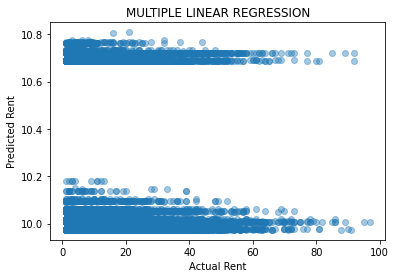

In [16]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

# 

# *회귀분석*

### 가설
독립 변수 x 갯수 : 6<br><br>
<b>H(x) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + b</b>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [18]:
result = sm.ols(formula = 'target ~ marketing_channel + sex + age_group + date_joined + os + revenue',
                data = df).fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     68.56
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           6.69e-72
Time:                        00:11:55   Log-Likelihood:            -1.4582e+06
No. Observations:              396808   AIC:                         2.916e+06
Df Residuals:                  396802   BIC:                         2.916e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1698      0.178     57.086      0.000       9.821      10.519
marketing_channel     0.7186      0.039     18.340      0.000       0.642       0.795
sex                  -0.0167      0.015     -1.101      0.271      -0.047       0.013
age_group            -0.0072      0.016     -0.451      0.652      -0.039       0.024
date_joined          -0.0353      0.045     -0.782      0.434      -0.124       0.053
os                   -0.0167      0.015     -1.101      0.271      -0.047       0.013
revenue           -4.243e-05   9.17e-05     -0.463      0.644      -0.000       0.000
==============================================================================
Omnibus:                   167976.345   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           895425.378
Skew:                           2.005   Prob(JB):                         0.00
Kurtosis:                       9.170   Cond. No.                     7.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
pred = result.predict()

In [21]:
ag = np.array(df.age_group.tolist())
target = np.array(df.target.tolist())

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


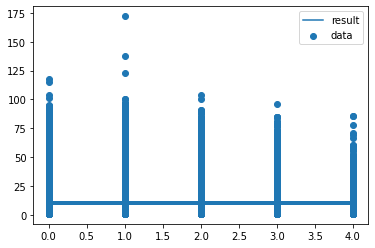

In [22]:
plt.yticks(fontname = "Arial")
plt.scatter(ag, target, label="data")
plt.plot(ag, pred, label="result")
plt.legend()
plt.show()

# 

### 데이터 불균형으로 회귀식  성립이 되지 않는 것으로 판단되어 각 범위를 40 크기로 세팅

### data cleansing
age_group: 0  visits: 40~80<br>
age_group: 1  visits: 30~70<br>
age_group: 2  visits: 20~60<br>
age_group: 3  visits: 10~50<br>
age_group: 4  visits: ~40

In [23]:
df_0 = df[df.age_group.apply(lambda x: x==0)]
df_1 = df[df.age_group.apply(lambda x: x==1)]
df_2 = df[df.age_group.apply(lambda x: x==2)]
df_3 = df[df.age_group.apply(lambda x: x==3)]
df_4 = df[df.age_group.apply(lambda x: x==4)]

In [24]:
df_0 = df_0[df_0.target.apply(lambda x: x>=40 and x<= 80)]
df_1 = df_1[df_1.target.apply(lambda x: x>=30 and x<= 70)]
df_2 = df_2[df_2.target.apply(lambda x: x>=20 and x<= 60)]
df_3 = df_3[df_3.target.apply(lambda x: x>=10 and x<= 50)]
df_4 = df_4[df_4.target.apply(lambda x: x>=0 and x<= 40)]

In [25]:
df = pd.concat([df_0, df_1, df_2, df_3, df_4])

# 

### 가설
독립 변수 x 갯수 : 6<br><br>
<b>H(x) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + b</b>

In [26]:
result = sm.ols(formula = 'target ~ marketing_channel + sex + age_group + date_joined + os + revenue',
                data = df).fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:12:05   Log-Likelihood:            -1.2358e+05
No. Observations:               35048   AIC:                         2.472e+05
Df Residuals:                   35042   BIC:                         2.472e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            48.2095      0.521     92.580      0.000      47.189      49.230
marketing_channel     0.2089      0.111      1.885      0.059      -0.008       0.426
sex                  -0.0134      0.044     -0.303      0.762      -0.100       0.073
age_group            -9.8217      0.040   -243.112      0.000      -9.901      -9.743
date_joined           0.0033      0.131      0.025      0.980      -0.253       0.260
os                   -0.0134      0.044     -0.303      0.762      -0.100       0.073
revenue           -2.576e-05      0.000     -0.095      0.924      -0.001       0.001
==============================================================================
Omnibus:                     7278.527   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13217.101
Skew:                           1.324   Prob(JB):                         0.00
Kurtosis:                       4.426   Cond. No.                     8.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.84e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 

### 가설
독립 변수 x : marketing_channel, age_group<br><br>
<b>H(x) = w1x1 + w2x2 + b</b>

In [28]:
result = sm.ols(formula = 'target ~ marketing_channel + age_group',
                data = df).fit()

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 2.956e+04
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:12:39   Log-Likelihood:            -1.2358e+05
No. Observations:               35048   AIC:                         2.472e+05
Df Residuals:                   35045   BIC:                         2.472e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            48.2054      0.102    472.764      0.000      48.006      48.405
marketing_channel     0.2080      0.109      1.906      0.057      -0.006       0.422
age_group            -9.8216      0.040   -243.141      0.000      -9.901      -9.742
==============================================================================
Omnibus:                     7278.849   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13218.108
Skew:                           1.325   Prob(JB):                         0.00
Kurtosis:                       4.426   Cond. No.                         7.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred = result.predict()

In [31]:
dj = np.array(df.age_group.tolist())
target = np.array(df.target.tolist())

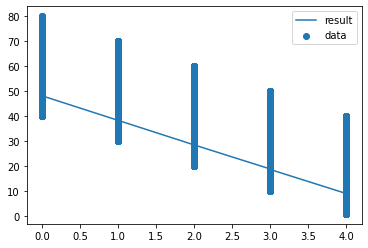

In [32]:
plt.yticks(fontname = "Arial")
plt.scatter(dj, target, label="data")
plt.plot(dj, pred, label="result")
plt.legend()
plt.show()

# 

# *Data Save*

In [33]:
df = df[['age_group', 'target']]

In [34]:
fm.save('../../data/df_regression_2.pickle', df)

Saved 35048 records
